In [351]:
class maths1:
    def __init__(self):
        pass 
      
    def tanh(self,val):
        e=2.718281828459045
        return (e**val-e**-val)/(e**val+e**-val)

    
    
    def sigmoid(self,val):
        e=2.718281828459045
        return (1/(1+e**(-val)))
    
    
    def sigmoid_der(self,val):
        val1=self.sigmoid(val)
        
        return (val1*(1-val1))
    
    
    def tanh_der(self,val):
       
        temp=self.tanh(val)
       
        return (1-temp**2)
        
        
    

In [352]:
class LSTM1:
    def __init__(self,input_data,output_data,learning_rate):
        self.input_data=input_data
        self.output_data=output_data
        self.del_L_by_del_Ri=0
        self.del_L_by_del_Ro=0
        self.del_L_by_del_Rz=0
            
        self.del_L_by_del_Wi=0
        self.del_L_by_del_Wo=0
        self.del_L_by_del_Wz=0
        
        self.del_L_by_del_Ri=0
        self.del_L_by_del_Ro=0
        self.del_L_by_del_Rz=0
        self.learning_rate=learning_rate

        self.maths1=maths1()
        pass
    
    class Cell:
        def __init__(self,xt,output_data):
            self.dl_by_dc=0
            self.error=0
            
            self.wi=0
            self.wo=0
            self.wz=0
            self.wf=0
            self.Ri=0
            self.Ro=0
            self.Rf=0
            self.Rz=0
            self.ct=0
            self.ot=0
            self.zt=0
            self.yt=0
           
            #self.dl_by=0
            self.xt=xt
            self.output_data=output_data
            self.maths=maths1()
        def get_cell_status(self):
            print('<------------------------The input to cell is -------------------------------------------->')
            print('')
            print(self.xt)
            print('')
            print('<------------------------Weight wi is-------------------------------------------->')
            print('')
            print(self.wi)
            print('')
            print('<------------------------Weight wo is-------------------------------------------->')
            print('')
            print(self.wo)
            print('')
            print('<------------------------Weight wz is-------------------------------------------->')
            print('')
            print(self.wz)
            print('')
            print('<------------------------Weight Ri is-------------------------------------------->')
            print('')
            print(self.Ri)
            print('')
            print('<------------------------Weight Ro is-------------------------------------------->')
            print('')
            print(self.Ro)
            print('')
            print('<------------------------Weight Rz is-------------------------------------------->')
            print('')
            print(self.Rz)
            print('')
            print('<------------------------ct is-------------------------------------------->')
            print('')
            print(self.ct)
            print('')
            print('<------------------------ot is-------------------------------------------->')
            print('')
            print(self.ot)
            print('')
            print('<------------------------zt is-------------------------------------------->')
            print('')
            print(self.zt)
            print('<------------------------yt is -------------------------------------------->')
            print('')
            print(self.yt)
            print('')
            print('<-------------------------------------------------------------------->')
            pass
            

        def calc_forw(self):
            self.it=self.maths.sigmoid(self.wi*self.xt+self.Ri*self.yt)
            self.ot=self.maths.sigmoid(self.wo*self.xt+self.Ro*self.yt)
            #self.ft=self.maths.sigmoid(self.wf*self.xt+self.Rf*self.yt)
            self.zt=self.maths.tanh(self.wz*self.xt+self.Rz*self.yt)
            self.ct= self.ct+self.it*self.zt
            self.yt=self.ot*self.maths.tanh(self.ct)
            self.error=self.output_data-self.yt  
            
           
        def calc_back(self):
   
             
            self.dl_by_dy=self.error
            self.dl_by_do=self.dl_by_dy*self.maths.tanh(self.ct)
            self.dl_by_dc=self.dl_by_dy*self.ot*self.maths.tanh_der(self.ct)+self.dl_by_dc
            self.dl_by_di=self.dl_by_dc*self.zt
            self.dl_by_dz=self.dl_by_dc*self.it
            self.del_i=self.dl_by_di*self.maths.sigmoid_der(self.wi+self.Ri*self.yt)
            self.del_o= self.dl_by_do*self.maths.sigmoid_der(self.wo+self.Ro*self.yt)
            self.del_z=self.dl_by_dz*self.maths.tanh_der(self.wz+self.Rz*self.yt)
            
                           
        
    def initilize_cells(self):
        self.cells=[]
        for i in range(len(self.input_data)):
            self.cells.append(self.Cell(self.input_data[i],self.output_data))
            
        
    def forwardprop(self):

        try:
            for i in range(len(self.cells)):
                self.cells[i].calc_forw()
               
                #self.cells[i].get_cell_status()
        
                if i<len(self.cells)-1: 
                    self.cells[i+1].yt=self.cells[i].yt
                    self.cells[i+1].ct=self.cells[i].ct
                
        except(IndexError):
            print('Warning index error occured in forward prop. this was supposed to happen. dont worry about it')
    def backwardprop(self):
        for i in range(len(self.cells)-1,-1,-1):
            if (i==len(self.cells)-1):
                self.cells[i].calc_back()
            else: 
                self.cells[i].dl_by_dc=self.cells[i+1].dl_by_dc
                self.cells[i].calc_back()
                """Here we update weights"""
        for i in range(len(self.cells)):
            
            self.del_L_by_del_Ri= self.del_L_by_del_Ri+(self.cells[i].yt*self.cells[i].del_i)
            self.del_L_by_del_Ro= self.del_L_by_del_Ro+(self.cells[i].yt*self.cells[i].del_o)
            self.del_L_by_del_Rz= self.del_L_by_del_Rz+(self.cells[i].yt*self.cells[i].del_z)

            self.del_L_by_del_Wi= self.del_L_by_del_Wi+(self.cells[i].xt*self.cells[i].del_i)
            self.del_L_by_del_Wo= self.del_L_by_del_Wo+(self.cells[i].xt*self.cells[i].del_o)
            self.del_L_by_del_Wz= self.del_L_by_del_Wz+(self.cells[i].xt*self.cells[i].del_z)

            self.cells[i].wi= self.cells[i].wi+self.learning_rate*self.del_L_by_del_Wi
            self.cells[i].wo=self.cells[i].wo+self.learning_rate*self.del_L_by_del_Wo
            self.cells[i].wz=self.cells[i].wz+self.learning_rate*self.del_L_by_del_Wz
            #self.wf=100.1
            self.cells[i].Ri= self.cells[i].Ri+self.learning_rate*self.del_L_by_del_Ri
            self.cells[i].Ro=self.cells[i].Ri+self.learning_rate* self.del_L_by_del_Ro
            #self.cells[i].Rf=100.1
            self.cells[i].Rz=self.cells[i].Ri+self.learning_rate*self.del_L_by_del_Rz
            
    def train_epoc(self):
       
       
        wi=[]
        wo=[]
        wz=[]
        wf=[]
        Ri=[]
        Ro=[]
        Rf=[]
        Rz=[]
        ct=[]
        ot=[]
        zt=[]
        yt=[]
        out=[]
           
        
        error_list=[]
        for i in range(25):
            self.forwardprop()
            self.backwardprop()
            #print('')
            #print('')
            #print('---------------input---------------------')
            #print(self.cells[3].xt)
            #print('')
            #print('')
            
           # print('----------------------- output------------')
            #print('')
           
            #print(self.cells[-1].yt)
            #print('')
            #print('-------------------Error-------------------')
            
            #print('')
            #print(self.cells[-1].error)
            ##print('')
            #print('')
            #print('--------------------------------------------------------')
            
            
            temp1=[]
            temp2=[]
            temp3=[]
            temp4=[]
            temp5=[]
            temp6=[]
            temp7=[]
            for j in range(len(self.cells)):
                temp1.append(self.cells[j].wi)
                temp2.append(self.cells[j].wo)
                temp3.append(self.cells[j].wz)
                temp4.append(self.cells[j].Ri)
                temp5.append(self.cells[j].Ro)
                temp6.append(self.cells[j].Rz)
                temp7.append(self.cells[j].yt)
           
          
           
            error_list.append(self.cells[-1].error)
            wi.append(temp1)
            wo.append(temp2)
            wz.append(temp3)
           
            Ri.append(temp4)
            Ro.append(temp5)
            
            Rz.append(temp6)
            out.append(temp7)
            
            #print('----------------------This is Wi------------------------------')
            #print('')
            #print(wi[i])
            #print('')
            #print('........................................................')
        #print((error_list))
        ind=self.sign_change_in_list(error_list)
        if ind==False:
            
            a=self.get_min_index(error_list)
            #print('error= ',error_list[a], "\r")
            #print(error_list[a])
            return wi[a],wo[a],wz[a],Ri[a],Ro[a],Rz[a],out[a],error_list[a],self.cells[-1].ct
        else:
            #print('error= ',error_list[ind],"\r")
            #print(error_list[ind])
           # print(wi[ind])
           
            return wi[ind],wo[ind],wz[ind],Ri[ind],Ro[ind],Rz[ind],out[ind],error_list[ind],self.cells[-1].ct
        
            
    def sign_change_in_list(self,test_list):
        for idx in range(0, len(test_list) - 1):
            if ((test_list[idx] > 0 and test_list[idx + 1] < 0) or (test_list[idx] < 0 and test_list[idx + 1] > 0)):
                return (idx)
        return False
    
    
    
    def get_min_index(self,arr):
        min_val = arr[0]
        min_idx = 0
        for i in range(1, len(arr)):
            if arr[i] < min_val:
                min_val = arr[i]
                min_idx = i
        return min_idx
   
   
    
        
        
        
            
            
    




        
            

    
            
        
    

    
        
   
            
            
        
    

In [353]:

def train(input_matrix, target_vector):# 1. takes 2d list, each element of list must be another list, all the sublist should be of same dimension 2. also takes list of targets (one dimentional list)
           
    for i in range(len(input_matrix)):
        perc=((i+1)/len(input_matrix))*100
        #print(error=,"precentage of of training completed= ",perc,"%",end="\r")
        if i==0:
            ls=LSTM1(input_matrix[i],target_vector[i],0.01)
            ls.initilize_cells()            
            val=ls.train_epoc()
            
        else:
            #print("should nt be here")
            ls=LSTM1(input_matrix[i],target_vector[i],0.01)
            ls.initilize_cells()
            for i in range(len(ls.cells)):
                ls.cells[i].wi=val[0][i]
                ls.cells[i].wo=val[1][i]
                ls.cells[i].wz=val[2][i]
                ls.cells[i].Ri=val[3][i]
                ls.cells[i].Ro=val[4][i]
                ls.cells[i].Rz=val[5][i]
                     
            ls.cells[0].yt=val[6][3]
            #ls.cells[0].ct=val[8]
            
            val=ls.train_epoc()
            print("error=",val[7]," % completed = ",perc,end="\r")
            
            
    return val
                
            
def predict(input_data,wi,wo,wz,Ri,Ro,Rz):

        ct=0.0#6896658683337578
        yt=0.0#23388814044526404
        
        maths=maths1()
        
        for i in range(4):



            it=maths.sigmoid(wi[i]*input_data[i]+Ri[i]*yt)
            #print('it')
            #print(it)
            ot=maths.sigmoid(wo[i]*input_data[i]+Ro[i]*yt)
            #print('ot')
            #print(ot)

            #self.ft=self.maths.sigmoid(self.wf*self.xt+self.Rf*self.yt)
            zt=maths.tanh(wz[i]*input_data[i]+Rz[i]*yt)
            #print(wz[i]*input_data[i]+Rz[i]*yt)
            #print('zt')
            #print(zt)
            ct= ct+it*zt
            #print('ct')
            #print(ct)
            yt=ot*maths.tanh(ct)
           # print('yt')
        #print(yt)
        return yt
        
       
              
def pre(input_data,wi,wo,wz,Ri,Ro,Rz):
    ls=LSTM1(input_data,0,0.001)
    ls.initilize_cells()
    for i in range(len(ls.cells)):
        for j in range(5):
            ls.cells[i].wi=val[0][i]
            ls.cells[i].wo=val[1][i]
            ls.cells[i].wz=val[2][i]
            ls.cells[i].Ri=val[3][i]
            ls.cells[i].Ro=val[4][i]
            ls.cells[i].Rz=val[5][i]

    ls.forwardprop() 
    return ls.cells[3].yt



In [354]:

path='C://Users//bishal.ghimire//Desktop//data//loadValues.csv'
import numpy as np
import pandas as pd
class DataImport():
    
    def __init__(self,path):
        self.path=path
        self.get_data()
        #self.remove_rstrip()
        self.date_time_format('Time')
       
        pass
    def get_data(self):#reads csv file 
        self.data= pd.read_csv(self.path)
        
    def date_time_format(self,index): #changes a column of a pandas dataframe to date-time format, takes column index as input
        self.data[index]=pd.to_datetime(self.data[index])

    


In [355]:
class preprocessing():
    
    def __init__(self,pandas_df):
        self.data=pandas_df
        self.interpol()
        self.take_abs()
        self.scaling()
        self.give_parameter()
        pass
    
    def interpol(self):
        self.data=self.data.interpolate(method='linear')
    def take_abs(self):
        self.data['Consumption']=self.data['Consumption'].abs()
        pass
    def scaling(self):
        self.data['Consumption']=self.data['Consumption']/max(self.data['Consumption'])
    def give_parameter(self):
        print(self.data['Consumption'].describe())

    

In [373]:
temp0=DataImport(path)
temp1=preprocessing(temp0.data)
df=temp1.data
class LSTMDataPreprocessing():
    import numpy as np
    def __init__(self,df):
        self.df=df
        self.window_size=4
        self.source=[] #source=every five(window size) consucative  consumptions data
        self.target=[]# target=every 6th(window size+1) concumption data
        self.Sorce_Target()
        self.Train_Test_Validate()
        pass
    def Sorce_Target(self):#converts the pandas dataframe to numpy format serigates the source and target data
        #changing the pandas dataframe to numpy format
        df_numpy=self.df.to_numpy()
        
        for i in range (len(df_numpy)-self.window_size):
            row = [[a] for a in df_numpy[i:i+self.window_size]]
            self.source.append(row)
            label = df_numpy[i+self.window_size]
            self.target.append(label)
        self.source=np.array(self.source)
        self.target=np.array(self.target)
        
        pass
    def Train_Test_Validate(self):#splitting data into test train and validate 
        self.train_source=self.source[:int(len(self.source)*0.6)]
        self.train_target=self.target[:int(len(self.target)*0.6)]
        self.val_source=self.source[int(len(self.source)*0.6):int(len(self.source)*0.8)]
        self.val_target=self.target[int(len(self.target)*0.6):int(len(self.target)*0.8)]
        self.test_source=self.source[int(len(self.source)*0.8):]
        self.test_target=self.target[int(len(self.target)*0.8):]
    

count    105408.000000
mean          0.027871
std           0.046489
min           0.000000
25%           0.011932
50%           0.017860
75%           0.025737
max           1.000000
Name: Consumption, dtype: float64


In [374]:
temp2=LSTMDataPreprocessing(temp1.data['Consumption'])
temp2.val_source.shape
temp2.train_source.shape

(63242, 4, 1)

In [375]:
temp2.train_source.shape
train_source=temp2.train_source.reshape(63242,4).tolist()
train_target=temp2.train_target.reshape(63242,).tolist()
validate_source=temp2.val_source.reshape(21081,4).tolist()
validate_target=temp2.val_target.reshape(21081,).tolist()
test_source=temp2.test_source.reshape(21081,4).tolist()
test_target=test_source=temp2.test_target.reshape(21081).tolist()


In [376]:
train_source=temp2.train_source.reshape(63242,4).tolist()
train_target=temp2.train_target.reshape(63242,).tolist()
validate_source=temp2.val_source.reshape(21081,4).tolist()
validate_target=temp2.val_target.reshape(21081,).tolist()
test_source=temp2.test_source.reshape(21081,4).tolist()
test_target=temp2.test_target.reshape(21081).tolist()



In [377]:
def final(data,val):
    result=[]
    for i in data:
    
        a=predict(i,val[0],val[1],val[2],val[3],val[4],val[5])
        result.append(a)
    return result

In [378]:
a=train_source
b=train_target

val=train(a,b)
print(val)

([2.5693285340866727, 2.753123184089961, 2.808074617778461, 3.391344405727495], [0.5467427516177401, 0.36188156337090005, 0.3104190175037953, 0.23303481994115863], [0.8784041995255742, -1.1590066738106475, 0.2084592102040701, 2.085215596665305], [-0.6170241613894638, -0.11223123229746979, -0.03905663818445026, -0.03810918791683481], [-0.6170240419536753, -0.11223110345616688, -0.039056499865951805, -0.03810904905734632], [-0.6170104398831436, -0.112216763311139, -0.03904022812791295, -0.0380926250592736], [0.01914083766718204, 0.015589764150550125, 0.015945687111797665, 0.023388814044526404], 0.00020073773217080954, 0.06896658683337578)


In [379]:
data1=pd.DataFrame()
data2=pd.DataFrame()
data3=pd.DataFrame()

In [380]:
data1['train_target']=train_target
data2['validate_target']=validate_target
data3['test_target']=test_target

In [381]:
train_predict=final(train_source,val)
print("a")

a


In [382]:
data1['train_predict']=train_predict
data1['train_predict']=data1['train_predict']

In [383]:
validate_predict=final(validate_source,val)
print("a")

a


In [384]:
data2['validate_predict']=validate_predict
data2['validate_predict']=data2['validate_predict']

In [385]:
test_predict=final(test_source,val)
print("a")

a


In [386]:
data3['test_predict']=test_predict
data3['test_predict']=data3['test_predict']

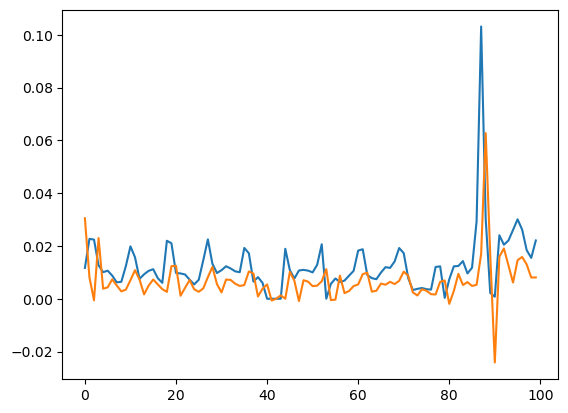

In [390]:
from matplotlib import pyplot as plt
plt.plot(data1['train_target'][0:100])
plt.plot(data1['train_predict'][0:100])

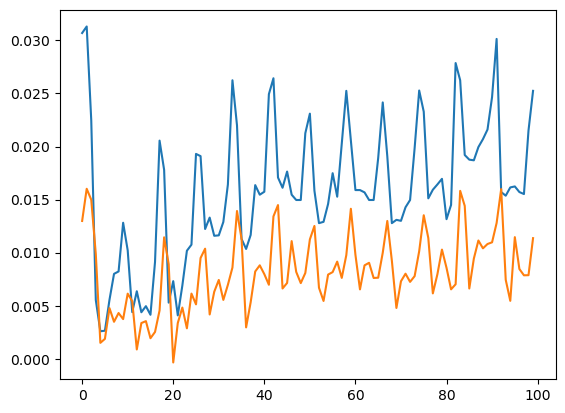

In [391]:
plt.plot(data2['validate_target'][0:100])
plt.plot(data2['validate_predict'][0:100])

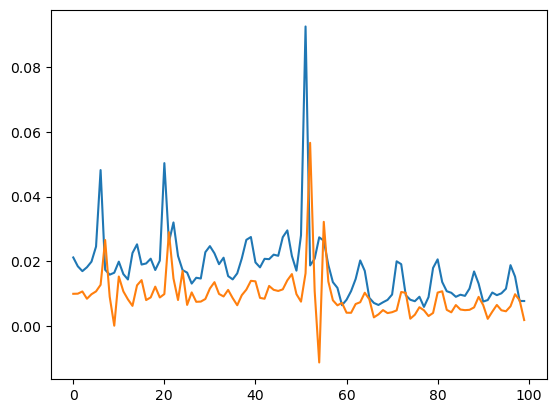

In [392]:
plt.plot(data3['test_target'][:100])
plt.plot(data3['test_predict'][0:100])

In [ ]:
print(pre([0.021202,0.018471,0.016981,0.018178],val[0],val[1],val[2],val[3],val[4],val[5]))
val=([-8.475582300068499,
  -8.549434629724544,
  -8.620279599224686,
  -8.678925008285988],
 [-7.072914710306213,
  -7.142380819368147,
  -7.195720992683331,
  -7.237728698745352],
 [3.3914829321081066,
  0.43384208091362186,
  -3.0404312548508137,
  -4.572122966454582],
 [-0.2627458964701951,
  -0.2585186086909802,
  -0.1175304057890975,
  -0.0013884897290057918],
 [-0.2627458972538163,
  -0.25851861011218324,
  -0.11753040747039037,
  -0.0013884913948544245],
 [-0.2627420975919523,
  -0.25851369931909013,
  -0.11752547137863875,
  -0.0013835543741565505],
 [0.043587088304193146,
  0.04389092429004108,
  0.03632332485888397,
  0.02135158882794075])